In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the CSV file
# The CSV file is in the same directory as your Python script
dataset_dir_name = "../MangoLeafBD Dataset"

# Get the current directory of the Python script
current_directory = os.getcwd()

# Construct the full path to the CSV file
DATADIR = os.path.join(current_directory, dataset_dir_name)

# List directories in DATADIR
CATEGORIES = [d for d in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR, d))]
print(CATEGORIES)
IMG_SIZE = 100

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


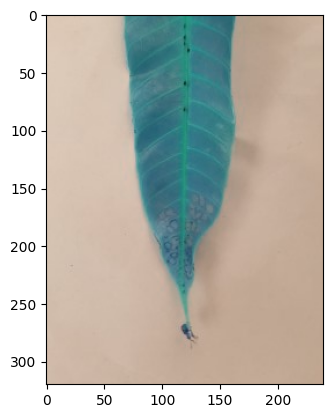

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [5]:
training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


create_training_data()

In [6]:
print(len(training_data))

4000


In [7]:
lenofimage = len(training_data)

In [8]:
X = []
y = []

for image_array, label in training_data:
    X.append(image_array)
    y.append(label)
X = np.array(X).reshape(lenofimage, -1)

In [9]:
X.shape

(4000, 30000)

**flattening the array**

In [10]:
X[1]

array([229, 214, 205, ..., 192, 167, 147], dtype=uint8)

max-scaling


In [11]:
X = X / 255.0

Ex. of flattened array...

In [12]:
X[1]

array([0.89803922, 0.83921569, 0.80392157, ..., 0.75294118, 0.65490196,
       0.57647059])

note : y should be in array form compulsory.


In [13]:
y = np.array(y)

In [14]:
y.shape

(4000,)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**KNN**

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [17]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

Accuracy on unknown data is 0.6725


In [18]:
print("Accuracy on unknown data is\n", classification_report(y_test, y_pred))

Accuracy on unknown data is
               precision    recall  f1-score   support

           0       0.58      0.75      0.65        93
           1       0.67      0.90      0.77       110
           2       1.00      0.64      0.78        97
           3       0.66      0.89      0.76        96
           4       0.61      0.55      0.58       108
           5       0.65      0.48      0.55       101
           6       0.71      0.58      0.64        96
           7       0.66      0.60      0.62        99

    accuracy                           0.67       800
   macro avg       0.69      0.67      0.67       800
weighted avg       0.69      0.67      0.67       800



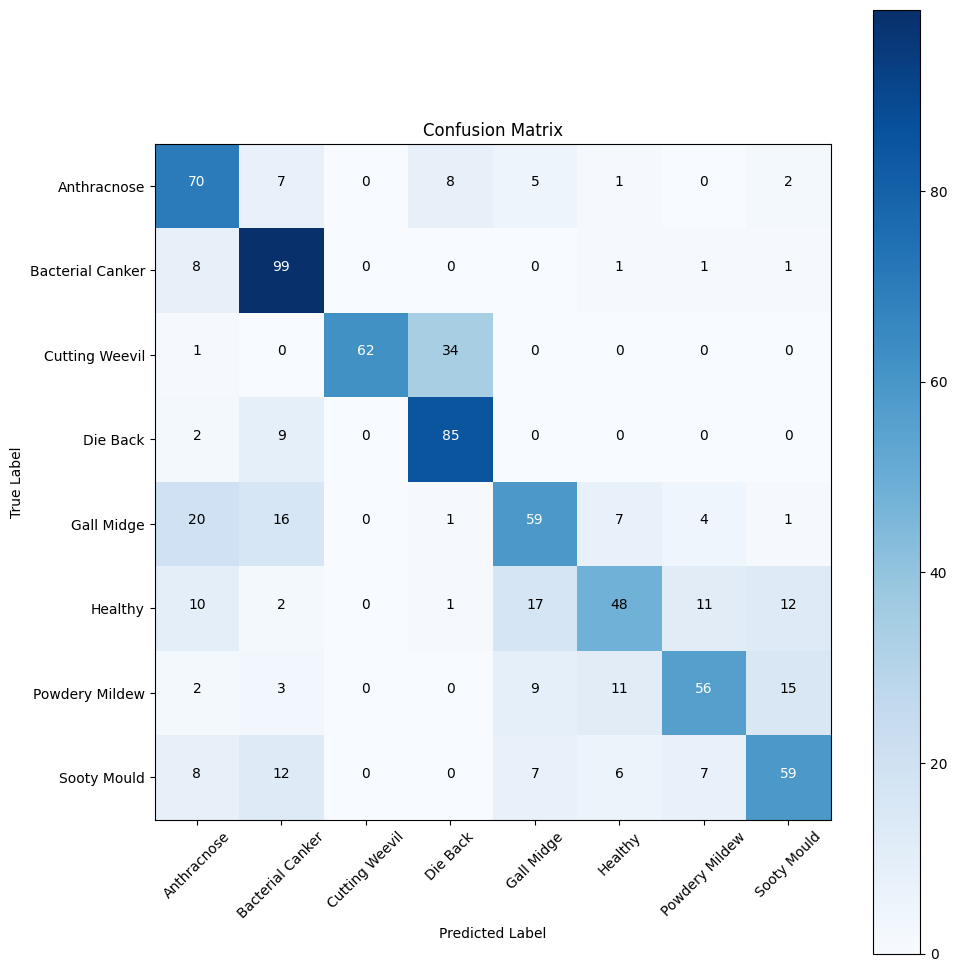

In [19]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()

using extracted **features** instead of image array for the model

In [27]:
# Load the CSV file
# The CSV file is in the same directory as your Python script
csv_file_name = "../features/features.csv"

# Get the current directory of the Python script
current_directory = os.getcwd()
# Construct the full path to the CSV file
csv_file_path = os.path.join(current_directory, csv_file_name)

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_file_path, index_col=0)
# Assuming 'classlabel' is the column containing the class labels
X = data.drop("classlabel", axis=1)  # Extract features by dropping the label column
y = data["classlabel"]  # Extract labels
# Convert the data to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

In [28]:
data.head()

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,major_axis,minor_axis,convex_area,...,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy,classlabel
0,17236.5,751.546244,259,112,2.312500,0.594198,0.383484,112,259,19932.5,...,166.094727,154.148958,59.423466,26.382730,18.001588,10.731971,0.992615,0.667995,8.494116,0
1,16122.5,751.889390,258,101,2.554455,0.618716,0.358372,101,258,18631.5,...,169.204805,157.146393,58.009444,25.463528,17.492831,11.945924,0.991202,0.667219,8.586526,0
2,19900.5,905.997035,320,117,2.735043,0.531530,0.304663,117,320,24944.5,...,157.709544,146.070885,61.024088,29.436061,22.680588,11.718123,0.993511,0.624838,9.203114,0
3,23603.5,926.222429,320,115,2.782609,0.641399,0.345745,115,320,25779.0,...,155.398958,143.729701,57.784381,29.392155,24.328512,12.300646,0.993161,0.623637,9.321460,0
4,21477.0,798.901583,320,96,3.333333,0.699121,0.422860,96,320,22713.0,...,168.528789,157.399310,65.547638,33.895692,24.244650,21.505493,0.990561,0.579790,9.424601,0


In [29]:
X[0]

array([1.72365000e+04, 7.51546244e+02, 2.59000000e+02, 1.12000000e+02,
       2.31250000e+00, 5.94198152e-01, 3.83484249e-01, 1.12000000e+02,
       2.59000000e+02, 1.99325000e+04, 8.64743509e-01, 1.69252227e+02,
       1.66094727e+02, 1.54148958e+02, 5.94234663e+01, 2.63827299e+01,
       1.80015884e+01, 1.07319709e+01, 9.92615103e-01, 6.67994546e-01,
       8.49411607e+00])

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**fitting our data in SVM model**

In [31]:
knn = KNeighborsClassifier(
    n_neighbors=9,
)
knn.fit(
    X_train,
    y_train,
)

KNeighborsClassifier(n_neighbors=9)

**predicting the X_test**

In [32]:
y_pred = knn.predict(X_test)

Evaluation 

In [33]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

Accuracy on unknown data is 0.48875


In [34]:
print("Accuracy on unknown data is\n"
      , classification_report(y_test, y_pred))

Accuracy on unknown data is
               precision    recall  f1-score   support

           0       0.33      0.34      0.33       104
           1       0.50      0.38      0.43        93
           2       0.79      0.95      0.86        86
           3       0.72      0.69      0.70       110
           4       0.39      0.60      0.47        99
           5       0.46      0.49      0.47       107
           6       0.30      0.25      0.27        93
           7       0.39      0.27      0.32       108

    accuracy                           0.49       800
   macro avg       0.48      0.49      0.48       800
weighted avg       0.48      0.49      0.48       800



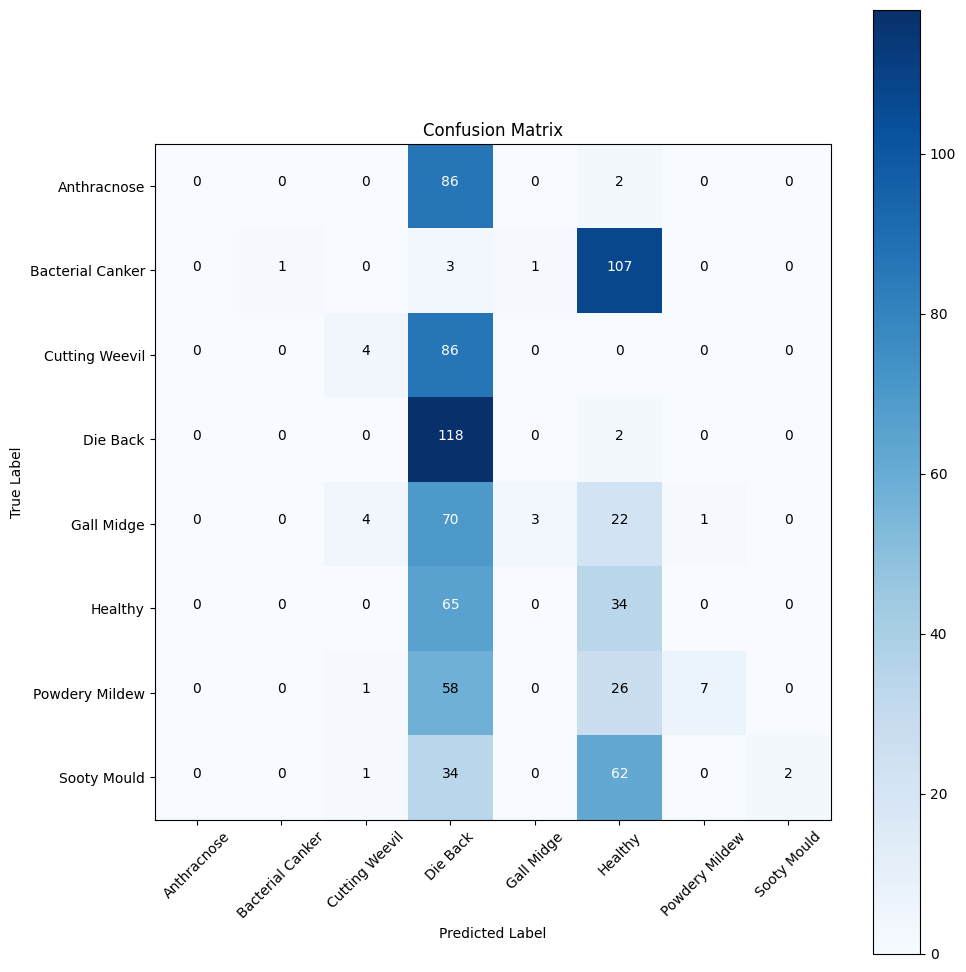

In [54]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()

In [ ]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "p": [1, 2],
    "leaf_size": [10, 20, 30],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "metric": ["euclidean", "manhattan"],
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_knn_model = grid_search.best_estimator_

Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


In [ ]:
y_pred = best_knn_model.predict(X_test)

In [ ]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

Accuracy on unknown data is 0.57375


In [ ]:
print("Accuracy on unknown data is", classification_report(y_test, y_pred))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.48      0.32      0.38       107
           1       0.56      0.47      0.51        85
           2       0.88      0.98      0.93       111
           3       0.75      0.80      0.77       108
           4       0.45      0.61      0.52        93
           5       0.45      0.59      0.51        95
           6       0.52      0.42      0.46       101
           7       0.41      0.35      0.38       100

    accuracy                           0.57       800
   macro avg       0.56      0.57      0.56       800
weighted avg       0.57      0.57      0.56       800



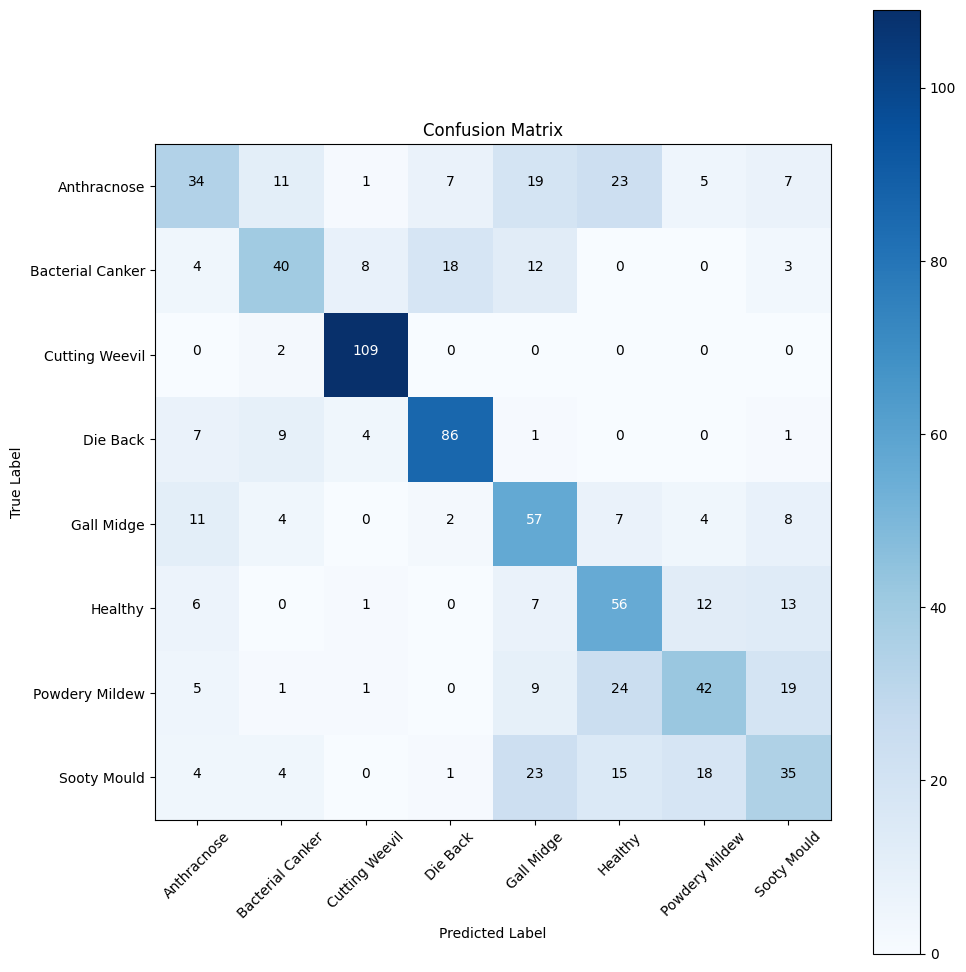

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()